# Import World Development Indicators and Combined Refugee Pop and GDP File.

---

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Read in Refugee/GDP Data and World Development Indicators

In [2]:
df = pd.read_csv('../../data/gdp_and_pop_refugee_final.csv')
df.head()

,Unnamed: 0,Year,Country of asylum,lookup,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Stateless persons,Others of concern,GDP_annual_change
0,0,2016,Afghanistan,Afghanistan,AFG,59770,123,1797551,0,114221,2.260314
1,1,2017,Afghanistan,Afghanistan,AFG,75927,215,1837079,0,448032,2.647003
2,2,2018,Afghanistan,Afghanistan,AFG,72228,281,2106893,0,489854,1.189228
3,3,2019,Afghanistan,Afghanistan,AFG,72227,247,2553390,0,447093,3.911603
4,4,2020,Afghanistan,Afghanistan,AFG,72278,167,2886317,0,82595,-2.351101


In [3]:
df2 = pd.read_csv('../../data/world_dev_2.csv')
df2.head(5)

,Country Name,Year,Adequacy of social safety net programs (% of total welfare of beneficiary households),Adjusted savings: net national savings (current US$),Adjusted savings: particulate emission damage (current US$),"Adolescent fertility rate (births per 1,000 women ages 15-19)","Air transport, passengers carried",Alternative and nuclear energy (% of total energy use),"Annualized average growth rate in per capita real survey mean consumption or income, bottom 40% of population (%)","Annualized average growth rate in per capita real survey mean consumption or income, total population (%)",...,Population growth (annual %),Population living in slums (% of urban population),Prevalence of undernourishment (% of population),Refugee population by country or territory of asylum,"Share of youth not in education, employment or training, total (% of youth population)",Strength of legal rights index (0=weak to 12=strong),Tax revenue (% of GDP),Tax revenue (current LCU),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (national estimate)"
0,Afghanistan,2016,..,..,577403184.3,75.325,1917924,..,..,..,...,2.778034788,71.30000305,22.2,59770,..,9,9.502652783,1.16E+11,11.15799999,..
1,Afghanistan,2017,..,..,575149709.4,68.957,1647425,..,..,..,...,2.54783304,..,23,75927,42.00999832,9,9.898450897,1.27E+11,11.18000031,11.18000031
2,Afghanistan,2018,..,..,557892202.2,65.141,1125367,..,..,..,...,2.384309079,70.69999695,23.4,72228,..,10,..,..,11.15200043,..
3,Afghanistan,2019,..,..,521580871.8,61.325,1066747.356,..,..,..,...,2.313073349,..,25.6,72227,..,10,..,..,11.21700001,..
4,Afghanistan,2020,..,..,..,..,449041.025,..,..,..,...,2.303812093,..,..,72278,53.75999832,..,..,..,11.71000004,11.71000004


## Combine the two DataFrames

In [4]:
combo_df = pd.merge(df, df2, how="left", left_on=['Country of asylum','Year'], right_on=['Country Name','Year'])

In [5]:
combo_df.head(30)

,Unnamed: 0,Year,Country of asylum,lookup,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Stateless persons,Others of concern,...,Population growth (annual %),Population living in slums (% of urban population),Prevalence of undernourishment (% of population),Refugee population by country or territory of asylum,"Share of youth not in education, employment or training, total (% of youth population)",Strength of legal rights index (0=weak to 12=strong),Tax revenue (% of GDP),Tax revenue (current LCU),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (national estimate)"
0,0,2016,Afghanistan,Afghanistan,AFG,59770,123,1797551,0,114221,...,2.778034788,71.30000305,22.2,59770,..,9,9.502652783,1.16E+11,11.15799999,..
1,1,2017,Afghanistan,Afghanistan,AFG,75927,215,1837079,0,448032,...,2.54783304,..,23,75927,42.00999832,9,9.898450897,1.27E+11,11.18000031,11.18000031
2,2,2018,Afghanistan,Afghanistan,AFG,72228,281,2106893,0,489854,...,2.384309079,70.69999695,23.4,72228,..,10,..,..,11.15200043,..
3,3,2019,Afghanistan,Afghanistan,AFG,72227,247,2553390,0,447093,...,2.313073349,..,25.6,72227,..,10,..,..,11.21700001,..
4,4,2020,Afghanistan,Afghanistan,AFG,72278,167,2886317,0,82595,...,2.303812093,..,..,72278,53.75999832,..,..,..,11.71000004,11.71000004
5,5,2021,Afghanistan,Afghanistan,AFG,72226,187,3204805,0,84742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,2016,Albania,Albania,ALB,141,2750,0,4921,0,...,-0.159880412,..,4.3,141,27.38999939,6,17.59022981,2.59E+11,15.42000008,15.42000008
7,7,2017,Albania,Albania,ALB,124,32,0,4460,2719,...,-0.091972294,..,4.1,124,26.22999954,8,18.88749198,2.93E+11,13.61999989,13.61999989
8,8,2018,Albania,Albania,ALB,132,159,0,4160,76,...,-0.246732042,..,4,132,26.61000061,8,18.54595166,3.04E+11,12.30000019,12.30000019
9,9,2019,Albania,Albania,ALB,120,5,0,3687,153,...,-0.426007367,..,3.9,120,25.81999969,8,18.14624801,3.07E+11,11.47000027,11.47000027


## Cleaning
---
Deleted 2021 year due to little data and deleted the Unnamed:0 column

In [6]:
combo_df=combo_df[combo_df['Year'] != 2021]

In [7]:
combo_df.drop(columns="Unnamed: 0",inplace=True)

In [8]:
combo_df.head(30)

,Year,Country of asylum,lookup,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Stateless persons,Others of concern,GDP_annual_change,...,Population growth (annual %),Population living in slums (% of urban population),Prevalence of undernourishment (% of population),Refugee population by country or territory of asylum,"Share of youth not in education, employment or training, total (% of youth population)",Strength of legal rights index (0=weak to 12=strong),Tax revenue (% of GDP),Tax revenue (current LCU),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (national estimate)"
0,2016,Afghanistan,Afghanistan,AFG,59770,123,1797551,0,114221,2.260314,...,2.778034788,71.30000305,22.2,59770,..,9,9.502652783,1.16E+11,11.15799999,..
1,2017,Afghanistan,Afghanistan,AFG,75927,215,1837079,0,448032,2.647003,...,2.54783304,..,23,75927,42.00999832,9,9.898450897,1.27E+11,11.18000031,11.18000031
2,2018,Afghanistan,Afghanistan,AFG,72228,281,2106893,0,489854,1.189228,...,2.384309079,70.69999695,23.4,72228,..,10,..,..,11.15200043,..
3,2019,Afghanistan,Afghanistan,AFG,72227,247,2553390,0,447093,3.911603,...,2.313073349,..,25.6,72227,..,10,..,..,11.21700001,..
4,2020,Afghanistan,Afghanistan,AFG,72278,167,2886317,0,82595,-2.351101,...,2.303812093,..,..,72278,53.75999832,..,..,..,11.71000004,11.71000004
6,2016,Albania,Albania,ALB,141,2750,0,4921,0,3.314981,...,-0.159880412,..,4.3,141,27.38999939,6,17.59022981,2.59E+11,15.42000008,15.42000008
7,2017,Albania,Albania,ALB,124,32,0,4460,2719,3.802227,...,-0.091972294,..,4.1,124,26.22999954,8,18.88749198,2.93E+11,13.61999989,13.61999989
8,2018,Albania,Albania,ALB,132,159,0,4160,76,4.019360,...,-0.246732042,..,4,132,26.61000061,8,18.54595166,3.04E+11,12.30000019,12.30000019
9,2019,Albania,Albania,ALB,120,5,0,3687,153,2.113420,...,-0.426007367,..,3.9,120,25.81999969,8,18.14624801,3.07E+11,11.47000027,11.47000027
10,2020,Albania,Albania,ALB,105,0,0,1031,10,-3.955398,...,-0.577942252,..,..,115,..,..,..,..,13.32900047,..


## Exploratory Data Analysis
---
Looking at information for the dataframe.

## Replacing '..' in the DataFrme to None

In [9]:
combo_df.replace({'..': None},inplace =True)

In [10]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 1055
Data columns (total 80 columns):
 #   Column                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                               --------------  -----  
 0   Year                                                                                                                 878 non-null    int64  
 1   Country of asylum                                                                                                    878 non-null    object 
 2   lookup                                                                                                               871 non-null    object 
 3   Country of asylum (ISO)                                                                                              878 non-null    object 
 4   Refugees unde

### Dropping Columns with Many Null Values.

In [11]:
combo_df.drop(columns=[
    'Alternative and nuclear energy (% of total energy use)',
    'Net official flows from UN agencies, UNEP (current US$)',
    'Net official flows from UN agencies, UNIDIR (current US$)',
    'Net official flows from UN agencies, UNTA (current US$)',
    'Number of people spending more than 25% of household consumption or income on out-of-pocket health care expenditure' ],  inplace=True)

### Changing all Net Flow from UN Agencies into Numeric

In [12]:
cols=['Net official flows from UN agencies, FAO (current US$)',
      'Net official flows from UN agencies, IAEA (current US$)',
'Net official flows from UN agencies, IFAD (current US$)',
'Net official flows from UN agencies, ILO (current US$)',
'Net official flows from UN agencies, UNAIDS (current US$)', 
'Net official flows from UN agencies, UNDP (current US$)',
'Net official flows from UN agencies, UNECE (current US$)',

'Net official flows from UN agencies, UNFPA (current US$)', 
'Net official flows from UN agencies, UNHCR (current US$)',
'Net official flows from UN agencies, UNICEF (current US$)',

'Net official flows from UN agencies, UNPBF (current US$)',
'Net official flows from UN agencies, UNRWA (current US$)',

'Net official flows from UN agencies, UNWTO (current US$)',
'Net official flows from UN agencies, WFP (current US$)',
'Net official flows from UN agencies, WHO (current US$)']

combo_df[cols] = combo_df[cols].apply(pd.to_numeric)

### Combining All Net Official Flows form UN Agencies to one Column

In [13]:
combo_df['Net official flows from UN agencies: Total']= combo_df[cols].sum(axis=1)

### Removing UN Agencies Columns

In [14]:
combo_df.drop(columns=cols,inplace=True)

### Removing all Columns With Less than 100 Non-null Values

In [15]:
for col in combo_df.columns:
    print(f'{col} has {combo_df[col].notnull().sum()} not nulls')
    if combo_df[col].notnull().sum() < 100:
        print(f'{col} being dropped')
        combo_df.drop(columns= col, inplace =True)

Year has 878 not nulls
Country of asylum has 878 not nulls
lookup has 871 not nulls
Country of asylum (ISO) has 878 not nulls
Refugees under UNHCR's mandate has 878 not nulls
Asylum-seekers has 878 not nulls
IDPs of concern to UNHCR has 878 not nulls
Stateless persons has 878 not nulls
Others of concern has 878 not nulls
GDP_annual_change has 726 not nulls
Country Name has 871 not nulls
Adequacy of social safety net programs (% of total welfare of beneficiary households) has 93 not nulls
Adequacy of social safety net programs (% of total welfare of beneficiary households) being dropped
Adjusted savings: net national savings (current US$) has 555 not nulls
Adjusted savings: particulate emission damage (current US$) has 629 not nulls
Adolescent fertility rate (births per 1,000 women ages 15-19) has 669 not nulls
Air transport, passengers carried has 715 not nulls
Annualized average growth rate in per capita real survey mean consumption or income, bottom 40% of population (%) has 83 not n

In [16]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 1055
Data columns (total 51 columns):
 #   Column                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                  --------------  -----  
 0   Year                                                                                                    878 non-null    int64  
 1   Country of asylum                                                                                       878 non-null    object 
 2   lookup                                                                                                  871 non-null    object 
 3   Country of asylum (ISO)                                                                                 878 non-null    object 
 4   Refugees under UNHCR's mandate                                                             

In [17]:
df.shape

(1057, 11)

# NOTE: Why are we keeping columns with so many nulls? What are the row counts for nulls? Are these the same countries? At most we can remove 52 Rows of data.... 

In [18]:
combo_df.isnull().sum()

Year                                                                                                        0
Country of asylum                                                                                           0
lookup                                                                                                      7
Country of asylum (ISO)                                                                                     0
Refugees under UNHCR's mandate                                                                              0
Asylum-seekers                                                                                              0
IDPs of concern to UNHCR                                                                                    0
Stateless persons                                                                                           0
Others of concern                                                                                           0
GDP_annual

In [19]:
combo_df.head()

,Year,Country of asylum,lookup,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Stateless persons,Others of concern,GDP_annual_change,...,Population living in slums (% of urban population),Prevalence of undernourishment (% of population),Refugee population by country or territory of asylum,"Share of youth not in education, employment or training, total (% of youth population)",Strength of legal rights index (0=weak to 12=strong),Tax revenue (% of GDP),Tax revenue (current LCU),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (national estimate)",Net official flows from UN agencies: Total
0,2016,Afghanistan,Afghanistan,AFG,59770,123,1797551,0,114221,2.260314,...,71.30000305,22.2,59770,None,9,9.502652783,1.16E+11,11.15799999,None,1.228899e+08
1,2017,Afghanistan,Afghanistan,AFG,75927,215,1837079,0,448032,2.647003,...,None,23,75927,42.00999832,9,9.898450897,1.27E+11,11.18000031,11.18000031,9.173278e+07
2,2018,Afghanistan,Afghanistan,AFG,72228,281,2106893,0,489854,1.189228,...,70.69999695,23.4,72228,None,10,None,None,11.15200043,None,8.469968e+07
3,2019,Afghanistan,Afghanistan,AFG,72227,247,2553390,0,447093,3.911603,...,None,25.6,72227,None,10,None,None,11.21700001,None,2.204802e+08
4,2020,Afghanistan,Afghanistan,AFG,72278,167,2886317,0,82595,-2.351101,...,None,None,72278,53.75999832,None,None,None,11.71000004,11.71000004,0.000000e+00


### Looking for trends on Null Values

In [20]:
combo_df[['Year','Country of asylum','Air transport, passengers carried','Coverage of social protection and labor programs (% of population)','Coverage of social safety net programs (% of population)'] ] 

,Year,Country of asylum,"Air transport, passengers carried",Coverage of social protection and labor programs (% of population),Coverage of social safety net programs (% of population)
0,2016,Afghanistan,1917924,None,None
1,2017,Afghanistan,1647425,None,None
2,2018,Afghanistan,1125367,None,None
3,2019,Afghanistan,1066747.356,None,None
4,2020,Afghanistan,449041.025,None,None
...,...,...,...,...,...
1051,2016,Zimbabwe,378803,None,None
1052,2017,Zimbabwe,282539,15.31451546,11.40076424
1053,2018,Zimbabwe,282539,None,None
1054,2019,Zimbabwe,None,36.7427737,31.09070171


# Removing Redundant Columns

In [21]:
combo_df.drop(columns=['lookup','Country of asylum (ISO)','Country Name'], inplace=True)

In [22]:
combo_df.rename(columns={'Country of asylum':'Country'}, inplace=True)

In [23]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 1055
Data columns (total 48 columns):
 #   Column                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                  --------------  -----  
 0   Year                                                                                                    878 non-null    int64  
 1   Country                                                                                                 878 non-null    object 
 2   Refugees under UNHCR's mandate                                                                          878 non-null    int64  
 3   Asylum-seekers                                                                                          878 non-null    int64  
 4   IDPs of concern to UNHCR                                                                   

### Removed Anguilla from the data because of missing data

In [24]:
combo_df=combo_df[combo_df['Country'] != 'Anguilla']

# Moved to Excel
---

Moved to an Excel file to easily sort and look for columns that had the most data so that we could do feature engineering. Due to limited time, this was kept in an excel file and then exported as a csv. While in Excel the data was changed from objects to either floats or integers. That file is read in below. 

The reason we did this was because we were narrowing down to only 300 rows of data. We switched methods and decided to not include country or year in the anlysis due to time constraints. This allowed us to remove columns that had large null values and left us with 551 rows of data below. 

In [25]:
df = pd.read_csv('../../data/combined_data_new_proposal_updated_observations_1.csv')
df.head()

,OldIndex,Year,Country,data counts,Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Stateless persons,Others of concern,Ref and Asyl,...,"Internally displaced persons, new displacement associated with disasters (number of cases)","International tourism, expenditures (current US$)","International tourism, receipts (current US$)",Military expenditure (current USD),Population growth (annual %),Prevalence of undernourishment (% of population),Refugee population by country or territory of asylum,Strength of legal rights index (0=weak to 12=strong),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Net official flows from UN agencies: Total
0,311,2016,El Salvador,31,41,0,0,0,9800,41,...,480.0,4.510000e+08,1161000000,247600000,0.489164,9.9,41.0,9,4.42,6.561136e+06
1,313,2018,El Salvador,31,44,16,71501,0,4700,60,...,4700.0,4.900000e+08,1370000000,294610000,0.509273,8.6,44.0,9,4.01,6.498476e+06
2,619,2016,Mexico,31,6178,2636,0,13,0,8814,...,12000.0,1.282300e+10,20619000000,5336875740,1.203260,5.8,6178.0,10,3.86,4.939827e+06
3,221,2016,Colombia,31,241,368,7410816,11,0,609,...,31000.0,4.891000e+09,5631000000,8675980823,1.367650,6.8,241.0,11,8.69,1.283793e+07
4,223,2018,Colombia,31,294,2851,7816473,11,0,3145,...,67000.0,5.531000e+09,6655000000,10134719591,1.524236,7.9,294.0,11,9.11,2.778100e+07


In [26]:
df.shape

(551, 35)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 35 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   OldIndex                                                                                    551 non-null    int64  
 1   Year                                                                                        551 non-null    int64  
 2   Country                                                                                     551 non-null    object 
 3   data counts                                                                                 551 non-null    int64  
 4   Refugees under UNHCR's mandate                                                              551 non-null    int64  
 5   Asylum-seekers                             

In [28]:
df.columns = df.columns.str.lstrip() 
df.columns = df.columns.str.rstrip() 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 35 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   OldIndex                                                                                    551 non-null    int64  
 1   Year                                                                                        551 non-null    int64  
 2   Country                                                                                     551 non-null    object 
 3   data counts                                                                                 551 non-null    int64  
 4   Refugees under UNHCR's mandate                                                              551 non-null    int64  
 5   Asylum-seekers                             

The columns listed as objects have commas and dollar signs. The below code removes both from the entire data frame.

In [31]:
df[df.columns[3:]] = df[df.columns[3:]].replace('[\$,]', '', regex=True).astype(float)

In [32]:
df['Adjusted savings: net national savings (current US$)'].sort_values(ascending=False).tail(50)

151   -1.059887e+09
128   -1.867767e+09
342   -1.911880e+09
301   -2.250440e+09
351   -3.042734e+09
316   -4.215583e+09
283   -5.480852e+09
317   -7.014963e+09
449   -7.897190e+09
450   -9.836776e+09
192   -1.020928e+10
196   -1.184488e+10
451   -1.217484e+10
87    -1.389716e+10
63    -1.416183e+10
62    -1.502792e+10
505   -2.081319e+10
514   -3.699185e+10
530   -3.981233e+10
497   -6.158226e+10
329             NaN
383             NaN
388             NaN
391             NaN
413             NaN
424             NaN
425             NaN
431             NaN
437             NaN
439             NaN
457             NaN
458             NaN
459             NaN
467             NaN
471             NaN
480             NaN
481             NaN
484             NaN
485             NaN
490             NaN
491             NaN
517             NaN
520             NaN
525             NaN
526             NaN
527             NaN
528             NaN
529             NaN
542             NaN
550             NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 35 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   OldIndex                                                                                    551 non-null    int64  
 1   Year                                                                                        551 non-null    int64  
 2   Country                                                                                     551 non-null    object 
 3   data counts                                                                                 551 non-null    float64
 4   Refugees under UNHCR's mandate                                                              551 non-null    float64
 5   Asylum-seekers                             

Looking at null values to see if there are any other columns to drop. 

In [34]:
df.isnull().sum()

OldIndex                                                                                        0
Year                                                                                            0
Country                                                                                         0
data counts                                                                                     0
Refugees under UNHCR's mandate                                                                  0
Asylum-seekers                                                                                  0
IDPs of concern to UNHCR                                                                        0
Stateless persons                                                                               0
Others of concern                                                                               0
Ref and Asyl                                                                                    0
SUM REFUGEE         

In [35]:
df.drop(columns = 'Internally displaced persons, new displacement associated with disasters (number of cases)', inplace=True)

In [38]:
df.head()

,OldIndex,Year,Country,data counts,Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Stateless persons,Others of concern,Ref and Asyl,...,GNI growth (annual %),"International tourism, expenditures (current US$)","International tourism, receipts (current US$)",Military expenditure (current USD),Population growth (annual %),Prevalence of undernourishment (% of population),Refugee population by country or territory of asylum,Strength of legal rights index (0=weak to 12=strong),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Net official flows from UN agencies: Total
0,311,2016,El Salvador,31.0,41.0,0.0,0.0,0.0,9800.0,41.0,...,1.962239,4.510000e+08,1.161000e+09,2.476000e+08,0.489164,9.9,41.0,9.0,4.42,6.561136e+06
1,313,2018,El Salvador,31.0,44.0,16.0,71501.0,0.0,4700.0,60.0,...,2.420301,4.900000e+08,1.370000e+09,2.946100e+08,0.509273,8.6,44.0,9.0,4.01,6.498476e+06
2,619,2016,Mexico,31.0,6178.0,2636.0,0.0,13.0,0.0,8814.0,...,2.526165,1.282300e+10,2.061900e+10,5.336876e+09,1.203260,5.8,6178.0,10.0,3.86,4.939827e+06
3,221,2016,Colombia,31.0,241.0,368.0,7410816.0,11.0,0.0,609.0,...,2.422212,4.891000e+09,5.631000e+09,8.675981e+09,1.367650,6.8,241.0,11.0,8.69,1.283793e+07
4,223,2018,Colombia,31.0,294.0,2851.0,7816473.0,11.0,0.0,3145.0,...,1.748331,5.531000e+09,6.655000e+09,1.013472e+10,1.524236,7.9,294.0,11.0,9.11,2.778100e+07


Below we are looking for the shape of the graphs for those columns with null value to determine how to impute values. GDP Annual Change and GNI Growth (annual %) are normally distributed so we will impute with the mean. The other histograms are all skewed so we will impute with the median for those columns.

array([[<AxesSubplot:title={'center':'GDP_annual_change'}>,
        <AxesSubplot:title={'center':'Adjusted savings: net national savings (current US$)'}>,
        <AxesSubplot:title={'center':'Air transport, passengers carried'}>],
       [<AxesSubplot:title={'center':'Fixed broadband subscriptions (per 100 people)'}>,
        <AxesSubplot:title={'center':'Fixed telephone subscriptions (per 100 people)'}>,
        <AxesSubplot:title={'center':'GNI growth (annual %)'}>],
       [<AxesSubplot:title={'center':'International tourism, expenditures (current US$)'}>,
        <AxesSubplot:title={'center':'International tourism, receipts (current US$)'}>,
        <AxesSubplot:title={'center':'Military expenditure (current USD)'}>],
       [<AxesSubplot:title={'center':'Prevalence of undernourishment (% of population)'}>,
        <AxesSubplot:title={'center':'Refugee population by country or territory of asylum'}>,
        <AxesSubplot:>]], dtype=object)

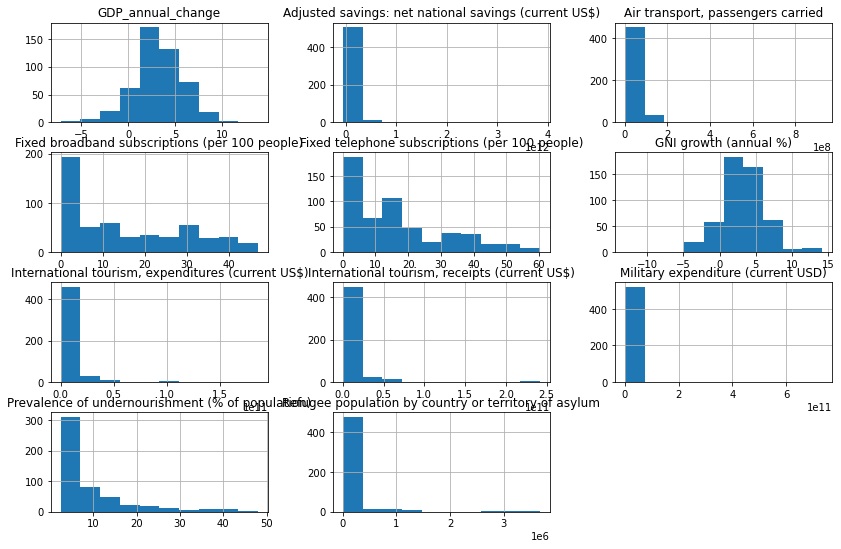

In [43]:
plt.rcParams['figure.figsize'] = (14, 9)
df.loc[:, df.isnull().any()].hist()

In [49]:
df['GDP_annual_change'].replace(to_replace = np.nan, value= df['GDP_annual_change'].mean(), inplace=True)
df['GNI growth (annual %)'].replace(to_replace = np.nan, value= df['GNI growth (annual %)'].mean(), inplace=True)

df['Adjusted savings: net national savings (current US$)'].replace(to_replace = np.nan, value= df['Adjusted savings: net national savings (current US$)'].median(), inplace=True)
df['Air transport, passengers carried'].replace(to_replace = np.nan, value= df['Air transport, passengers carried'].median(), inplace=True)
df['Fixed broadband subscriptions (per 100 people)'].replace(to_replace = np.nan, value= df['Fixed broadband subscriptions (per 100 people)'].median(), inplace=True)
df['Fixed telephone subscriptions (per 100 people)'].replace(to_replace = np.nan, value= df['Fixed telephone subscriptions (per 100 people)'].median(), inplace=True)
df['International tourism, expenditures (current US$)'].replace(to_replace = np.nan, value= df['International tourism, expenditures (current US$)'].median(), inplace=True)
df['International tourism, receipts (current US$)'].replace(to_replace = np.nan, value= df['International tourism, receipts (current US$)'].median(), inplace=True)
df['Military expenditure (current USD)'].replace(to_replace = np.nan, value= df['Military expenditure (current USD)'].median(), inplace=True)
df['Prevalence of undernourishment (% of population)'].replace(to_replace = np.nan, value= df['Prevalence of undernourishment (% of population)'].median(), inplace=True)
df['International tourism, expenditures (current US$)'].replace(to_replace = np.nan, value= df['International tourism, expenditures (current US$)'].median(), inplace=True)
df['Refugee population by country or territory of asylum'].replace(to_replace = np.nan, value= df['Refugee population by country or territory of asylum'].median(), inplace=True)


In [50]:
df.isnull().sum()

OldIndex                                                                           0
Year                                                                               0
Country                                                                            0
data counts                                                                        0
Refugees under UNHCR's mandate                                                     0
Asylum-seekers                                                                     0
IDPs of concern to UNHCR                                                           0
Stateless persons                                                                  0
Others of concern                                                                  0
Ref and Asyl                                                                       0
SUM REFUGEE                                                                        0
GDP_annual_change                                                

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 34 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   OldIndex                                                                         551 non-null    int64  
 1   Year                                                                             551 non-null    int64  
 2   Country                                                                          551 non-null    object 
 3   data counts                                                                      551 non-null    float64
 4   Refugees under UNHCR's mandate                                                   551 non-null    float64
 5   Asylum-seekers                                                                   551 non-null    float64
 6   IDPs of co

### Remove unnecessary columns.

In [52]:
df.drop(columns = ['OldIndex', 'data counts'], inplace=True)

# Save Data as a CSV

In [54]:
df.to_csv('../../data/data_final.csv', index=False)